In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading in the data and cleaning it

In [24]:
with open('PopulationData.csv', 'r') as f:
    lines = f.readlines()
world_data = lines[218].strip('\n')
world_data = world_data.split(',')
world_data = world_data[5:]
for i in range(len(world_data)):
    world_data[i] = float(world_data[i].replace('"', ''))
years = list(range(1960, 2021))

## Converting the arrays to numpy arrays and reshaping the x-axis as well as flattening the arrays into 1D as opposed to 2D

In [25]:
years = np.array(years).reshape(-1, 1).flatten()
world_data = np.array(world_data).flatten()

## Takes the log of the world data

In [26]:
y_log = np.log(world_data)

## Fit the data to an exponential function and strip the coefficients

In [27]:
fit = np.polyfit(world_data, np.log(years), 1)
curve_fit = np.polyfit(years,y_log, 1)
firstCoEff,secondCoEff = curve_fit[0],curve_fit[1]

## Create another list of the predicted data to 2122

In [29]:
years = list(range(1960, 2123))
predicted_data = []
for i in range(2021, 2123):
    predicted_data.append(np.exp(secondCoEff) * np.exp(firstCoEff * i))
world_data = list(world_data)
trained_years = list(range(1960, 2021))
predicted_years = list(range(2021, 2123))

## Fits the model within the parameters of matplotlib and shows it off

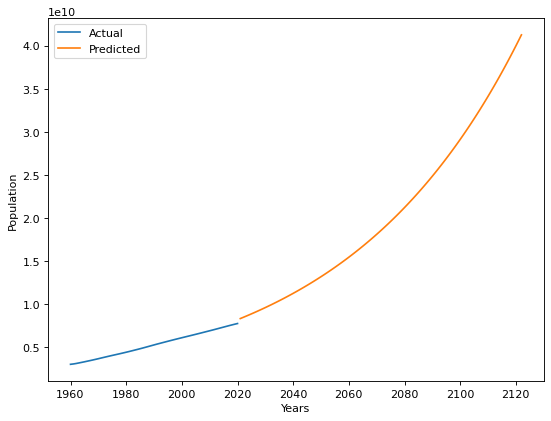

In [30]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(trained_years, world_data, label='Actual')
plt.plot(predicted_years, predicted_data, label='Predicted')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Population')
plt.show()